*Ingreso total por cada tienda*

In [3]:
#Extraer y cargar datos de archivos CSV en un diccionario de pandas DataFrames


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Librería para crear gráficos y visualizaciones en Python
import matplotlib.dates as mdates #Módulo de matplotlib para trabajar con fechas y tiempos en gráficos
import matplotlib.ticker as ticker #Módulo de matplotlib para formatear los ejes de los gráficos
import matplotlib.colors as mcolors #Módulo de matplotlib para trabajar con colores y mapas de colores
import matplotlib.cm as cm #Módulo de matplotlib para trabajar con mapas de colores
import seaborn as sns #Librería para crear gráficos estadísticos atractivos y informativos en Python

from pathlib import Path #Libreria para manejar rutas de archivos y directorios de forma orientada a objetos y multiplataforma

DATA_DIR = Path("../data") #Directorio de datos, Path crea un objeto de ruta a partir de una cadena de texto, en este caso "../data" que está un nivel por encima del directorio actual

tiendas = {} #Diccionario para almacenar los dataframes de cada tienda
for csv_file in DATA_DIR.glob("tienda_*.csv"): #Itera sobre todos los archivos CSV que comienzan con "tienda_" en el directorio de datos
    tiendas[csv_file.stem] = pd.read_csv(csv_file) #csv_file.stem extrae el nombre del archivo sin la extensión.csv y lo usa como clave en el diccionario, pd.read_csv(csv_file) lee el archivo CSV y lo almacena como un dataframe de pandas

tienda_1 = tiendas["tienda_1"]
tienda_2 = tiendas["tienda_2"]
tienda_3 = tiendas["tienda_3"]
tienda_4 = tiendas["tienda_4"]







In [4]:
def transform_data_time (df): #Función para transformar la columna 'Fecha de Compra' a un objeto datetime
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y') #Convierte la columna 'Fecha de Compra' a un objeto datetime de pandas, especificando el formato de la fecha
    df['Fecha de Compra'] = df['Fecha de Compra'].dt.date #Extrae solo la parte de la fecha (sin hora) y la convierte a un objeto de tipo date
    return df
transform_data_time (tienda_1) 
transform_data_time (tienda_2) 
transform_data_time (tienda_3) 
transform_data_time (tienda_4) 
print (tienda_1['Fecha de Compra'].max()) 
print (tienda_1['Fecha de Compra'].min())     
print (tienda_2['Fecha de Compra'].max()) 
print (tienda_2['Fecha de Compra'].min()) 
print (tienda_3['Fecha de Compra'].max()) 
print (tienda_3['Fecha de Compra'].min()) 
print (tienda_4['Fecha de Compra'].max()) 
print (tienda_4['Fecha de Compra'].min()) 
#tienda_1['Fecha de Compra'] = tienda_1['Fecha de Compra'].astype(str) #Convierte la columna 'Fecha de Compra' a tipo string

#tienda_1['Fecha de Compra'] = pd.to_datetime(tienda_1['Fecha de Compra'], format='%d/%m/%Y') #Convierte la columna 'Fecha de Compra' a un objeto datetime de pandas, especificando el formato de la fecha
#tienda_1['Fecha de Compra'] = tienda_1['Fecha de Compra'].dt.date 
#Extrae solo la parte de la fecha (sin hora) y la convierte a un objeto de tipo date


2023-03-31
2020-01-01
2023-03-31
2020-01-01
2023-03-31
2020-01-01
2023-03-30
2020-01-01


1. #Ingresos totales por tienda

In [5]:
#Función para calcular los Ingresos totales por tienda
def ingresos_totales(df, nombre_tienda): #df es el dataframe de la tienda y nombre_tienda es el nombre de la tienda 
    ingresos = df['Precio'].sum() #Suma la columna 'Precio' del dataframe df

    print (f'Los ingresos totales de la {nombre_tienda} del 2020-01-31 al 2023-03-31 son de  ${ingresos:.2f}')
    return ingresos #Devuelve los ingresos totales
ingresos_t1 = ingresos_totales(tienda_1, "Tienda 1")
ingresos_t2 = ingresos_totales(tienda_2, "Tienda 2")
ingresos_t3 = ingresos_totales(tienda_3, "Tienda 3")
ingresos_t4 = ingresos_totales(tienda_4, "Tienda 4")





Los ingresos totales de la Tienda 1 del 2020-01-31 al 2023-03-31 son de  $1150880400.00
Los ingresos totales de la Tienda 2 del 2020-01-31 al 2023-03-31 son de  $1116343500.00
Los ingresos totales de la Tienda 3 del 2020-01-31 al 2023-03-31 son de  $1098019600.00
Los ingresos totales de la Tienda 4 del 2020-01-31 al 2023-03-31 son de  $1038375700.00


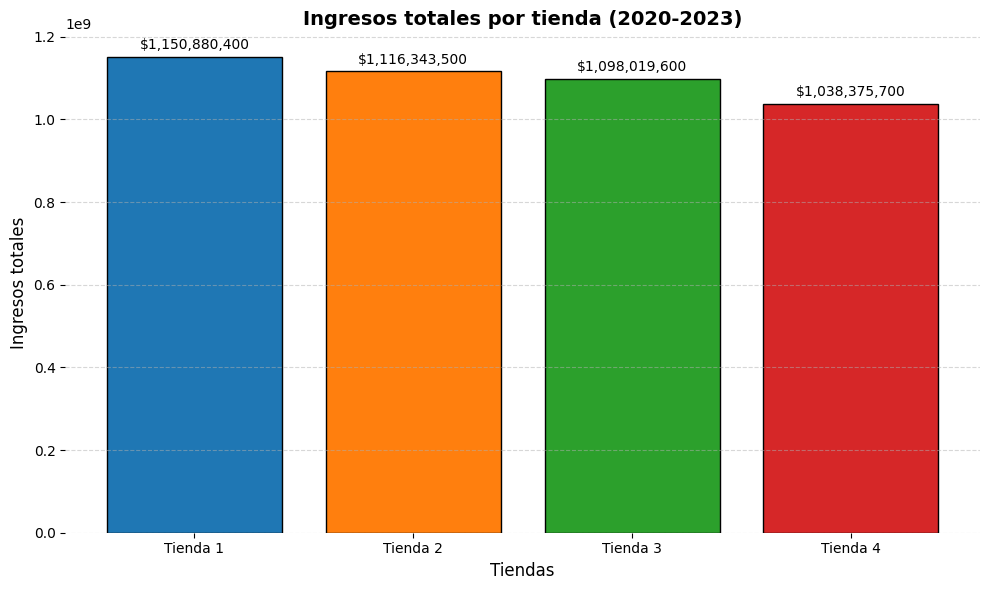

In [18]:
#Graficar los ingresos totales de cada tienda en un solo gráfico en el eje x son los ingresos y el el eje y es el nombre de la tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'] #Lista con los nombres de las tiendas
ingresos = [ingresos_t1, ingresos_t2, ingresos_t3, ingresos_t4] #Lista con los ingresos totales de cada tienda
palette = sns.color_palette("tab10") #Paleta de colores pastel de seaborn
plt.figure(figsize=(10, 6)) #Crea una figura de tamaño 10x6 pulgadas
bars =plt.bar (tiendas, ingresos, color=palette, edgecolor ='black', linewidth=1) #Crea un gráfico de barras con los nombres de las tiendas en el eje x y los ingresos totales en el eje y
for bar in bars:
    altura = bar.get_height() #Obtiene la altura de cada barra
    plt.text(bar.get_x() + bar.get_width()/2, altura +max(ingresos)*0.01, f'${altura:,.0f}', ha='center', va='bottom', fontsize=10) #Añade el valor de los ingresos totales encima de cada barra
    
plt.xlabel('Tiendas', fontsize=12) #Etiqueta del eje x
plt.ylabel('Ingresos totales', fontsize=12) #Etiqueta del eje y
plt.title('Ingresos totales por tienda (2020-2023)', fontsize=14, weight='bold') #Título del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.5) #Añade una cuadrícula en el eje y con líneas discontinuas
sns.despine(left=True, bottom=True) #Elimina los bordes del gráfico
plt.tight_layout() #Ajusta el diseño del gráfico para que no se superpongan los elementos
plt.show() #Muestra el gráfico




2. #Ventas por categorías

In [9]:
tienda_1.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [49]:
def ingresos_categoria(df, nombre_tienda): #Función para calcular los Ingresos totales por categoría
    ingresos_categoria = df.groupby('Categoría del Producto').agg(Productos_vendidos=('Producto', 'count'), Total=('Precio', 'sum')).sort_values(by='Productos_vendidos', ascending=False)

    #Agrupa el dataframe por la columna 'Categoría de producto', suma los precios y ordena los resultados de mayor a menor
    print (f'Las ventas totales de la {nombre_tienda} por categoría son:\n{ingresos_categoria}')
    return ingresos_categoria #Devuelve los ingresos totales por categoría
ingresos_categoria_t1 = ingresos_categoria(tienda_1, "Tienda 1")


Las ventas totales de la Tienda 1 por categoría son:
                         Productos_vendidos        Total
Categoría del Producto                                  
Muebles                                 465  187633700.0
Electrónicos                            448  429493500.0
Juguetes                                324   17995700.0
Electrodomésticos                       312  363685200.0
Deportes y diversión                    284   39290000.0
Instrumentos musicales                  182   91299000.0
Libros                                  173    8784900.0
Artículos para el hogar                 171   12698400.0


In [50]:
ingresos_categoria_t2 = ingresos_categoria(tienda_2, "Tienda 2")

Las ventas totales de la Tienda 2 por categoría son:
                         Productos_vendidos        Total
Categoría del Producto                                  
Muebles                                 442  176426300.0
Electrónicos                            422  410831100.0
Juguetes                                313   15945400.0
Electrodomésticos                       305  348567800.0
Deportes y diversión                    275   34744500.0
Instrumentos musicales                  224  104990300.0
Libros                                  197   10091200.0
Artículos para el hogar                 181   14746900.0


In [51]:
ingresos_categoria_t3 = ingresos_categoria(tienda_3, "Tienda 3")

Las ventas totales de la Tienda 3 por categoría son:
                         Productos_vendidos        Total
Categoría del Producto                                  
Muebles                                 499  201072100.0
Electrónicos                            451  410775800.0
Juguetes                                315   19401100.0
Electrodomésticos                       278  329237900.0
Deportes y diversión                    277   35593100.0
Libros                                  185    9498700.0
Artículos para el hogar                 177   15060000.0
Instrumentos musicales                  177   77380900.0


In [52]:
ingresos_categoria_t4 = ingresos_categoria(tienda_4, "Tienda 4")

Las ventas totales de la Tienda 4 por categoría son:
                         Productos_vendidos        Total
Categoría del Producto                                  
Muebles                                 480  192528900.0
Electrónicos                            451  409476100.0
Juguetes                                338   20262200.0
Deportes y diversión                    277   33350100.0
Electrodomésticos                       254  283260200.0
Artículos para el hogar                 201   15074500.0
Libros                                  187    9321300.0
Instrumentos musicales                  170   75102400.0


In [56]:
#Cancatenación de df para la visualización
pv1 = ingresos_categoria_t1[['Productos_vendidos']].rename(columns={'Productos_vendidos': 'Tienda 1'})
pv2 = ingresos_categoria_t2[['Productos_vendidos']].rename(columns={'Productos_vendidos': 'Tienda 2'})
pv3 = ingresos_categoria_t3[['Productos_vendidos']].rename(columns={'Productos_vendidos': 'Tienda 3'})
pv4 = ingresos_categoria_t4[['Productos_vendidos']].rename(columns={'Productos_vendidos': 'Tienda 4'})
df_vendidos_categoria_tiendas = pd.concat([pv1, pv2, pv3, pv4], axis=1) #Concatena los dataframes por columnas (axis=1)
df_vendidos_categoria_tiendas

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201
